In [1]:
import sys
sys.path.append('..')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as p9

In [4]:
%load_ext autoreload
%autoreload 2
from src.all_features import AllFS
from src.feature_selector import FeatureSelector, discretize, conditional_mutual_information
from src.data_generators import DataSetGenerator, draw_function
from src.experiment import Experiment
from src.jmi import JMI
from src.minimax import MiniMax
from src.mifs import MIFS
from src.lasso import LassoFS
from src.rffs import RandomForestFS

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [6]:
def generate_fs_list(df, stopping_features=100):
    allfs = AllFS(df)
    jmi = JMI(df, unique_th=10, stopping_n_features=10, stopping_criterium=0.01)
    mm = MiniMax(df, unique_th=10, stopping_n_features=min(10, stopping_features))
    mifs = MIFS(df, unique_th=10, stopping_n_features=min(20, stopping_features))
    rffs = RandomForestFS(df)
    lasso = LassoFS(df, unique_th=10)
    return [allfs, jmi, mm, mifs, lasso, rffs]

# Communities and Crime

In [7]:
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 

# data (as pandas dataframes) 
X = communities_and_crime.data.features.replace('?',np.NaN) 
y = communities_and_crime.data.targets.replace('?',np.NaN)

In [8]:
df = pd.concat([y, X], axis=1)._get_numeric_data()
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [9]:
features_sets = generate_fs_list(df)

In [10]:
communities_and_crime_experiment = Experiment(features_sets, OLS, df, "ViolentCrimesPerPop")
communities_and_crime_experiment.fit_fs()

In [11]:
communities_and_crime_experiment.print_results()

R-squared adjusted for AllFS = 0.6793037773347834                   and bic = -1748.3323553967452 with 101 features.
R-squared adjusted for JMI = 0.6196955003635882                   and bic = -2052.296049957855 with 3 features.
R-squared adjusted for MiniMax = 0.6098143709808939                   and bic = -1994.5536138953855 with 4 features.
R-squared adjusted for MIFS = 0.6091666548819471                   and bic = -1885.7849954247454 with 20 features.
R-squared adjusted for LassoFS = 0.6793037773347834                   and bic = -1748.3323553967452 with 101 features.
R-squared adjusted for RandomForestFS = 0.6218410123916933                   and bic = -1991.052988361489 with 14 features.


In [12]:
def plot_BIC(results):
    return (p9.ggplot(results, p9.aes(x="Method", y="bic")) +
        p9.geom_bar(stat='identity', fill="#4287f5") +
        p9.xlab("Method") +
        p9.ylab("BIC") +
        p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1)))

def plot_len(results):
    return (p9.ggplot(results, p9.aes(x="Method", y="len")) +
        p9.geom_bar(stat='identity', fill="#4287f5") +
        p9.xlab("Method") +
        p9.ylab("Number of features") +
        p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1)))

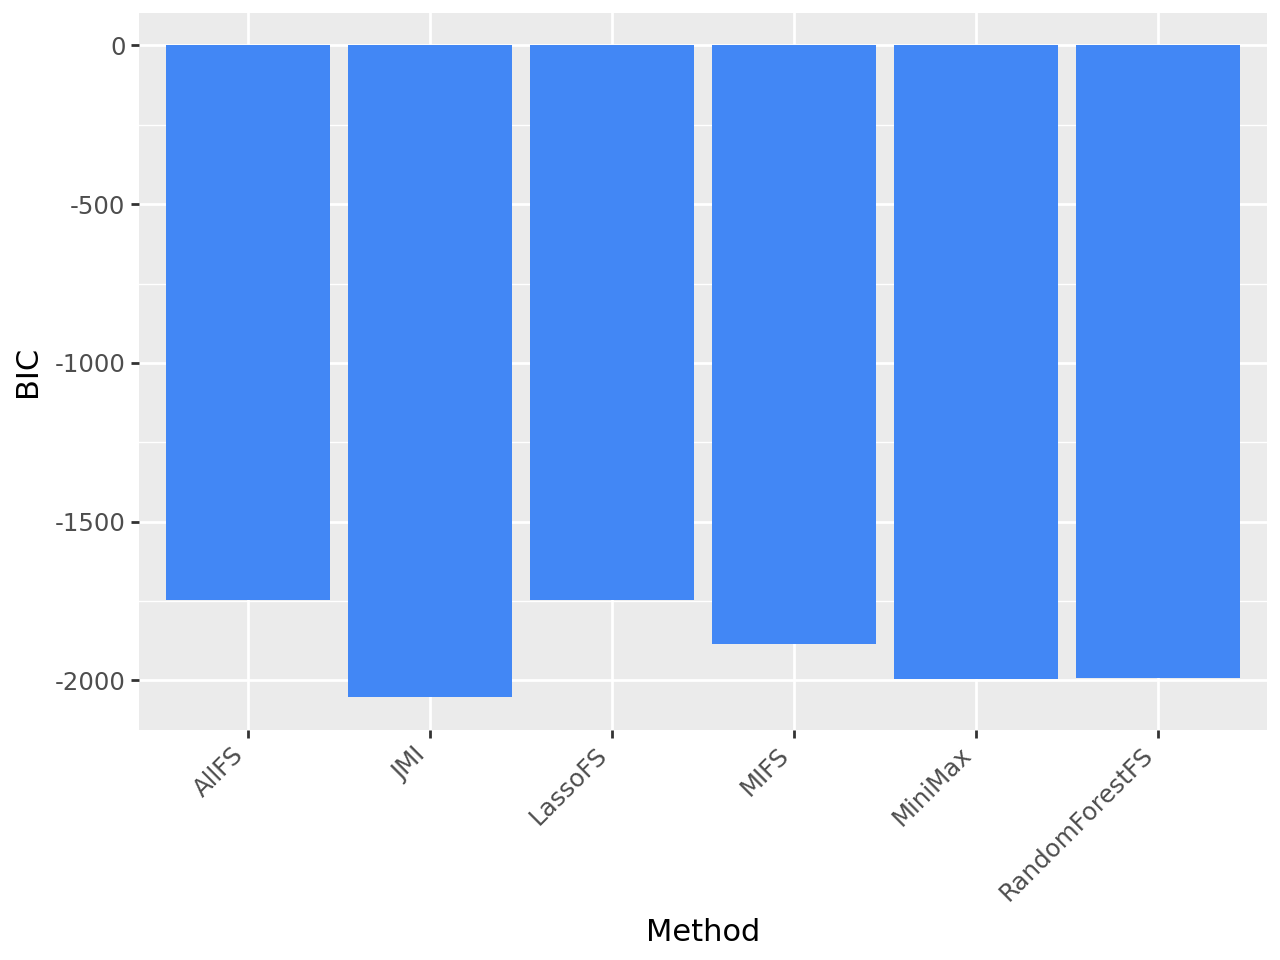

In [13]:
plot_BIC(communities_and_crime_experiment.results_pd)

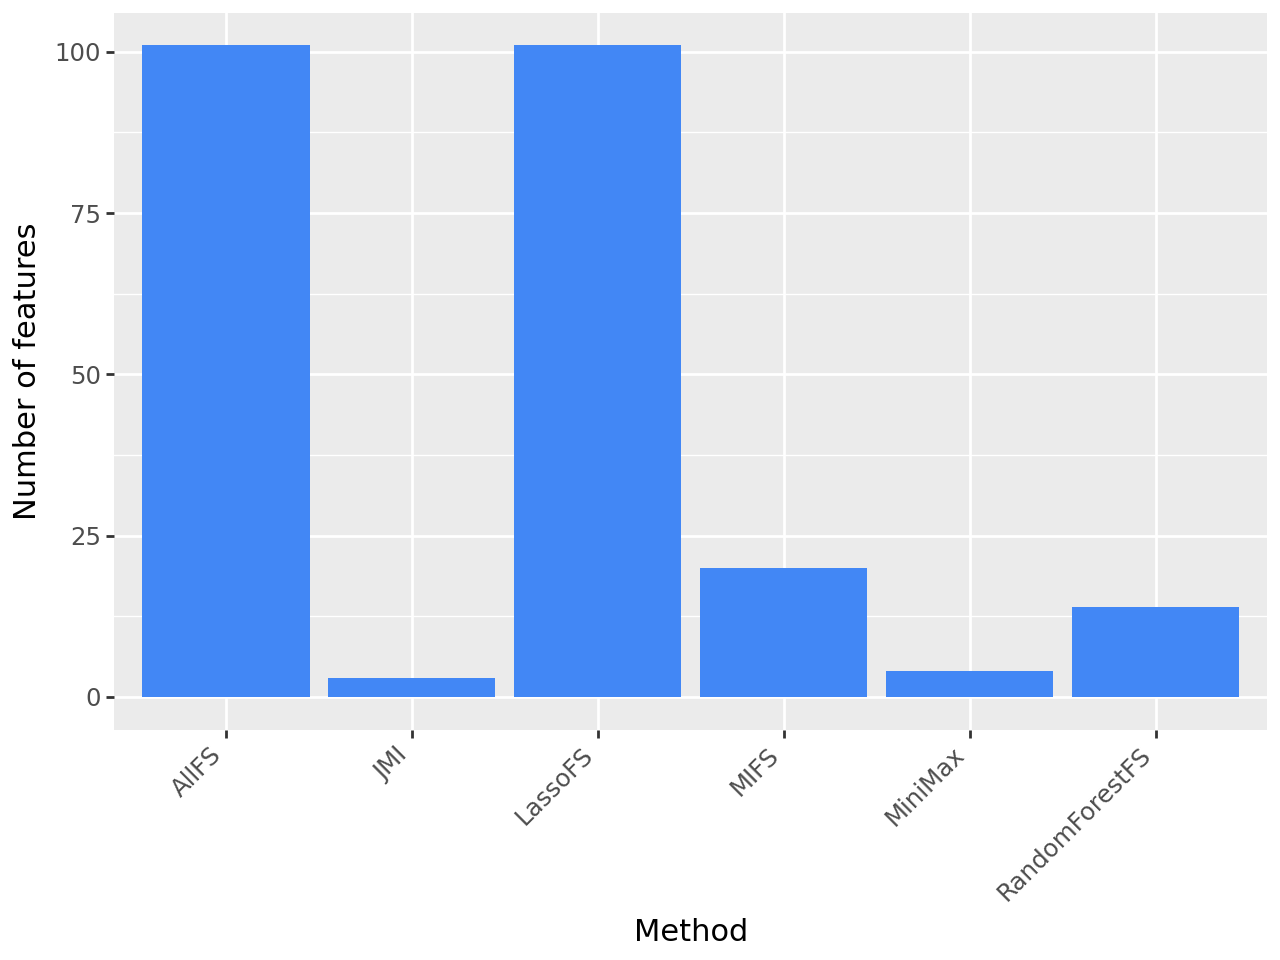

In [14]:
plot_len(communities_and_crime_experiment.results_pd)

# AIDS

In [15]:
# fetch dataset 
aids = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids.data.features 
y = aids.data.targets 

In [16]:
df = pd.concat([y, X], axis=1)._get_numeric_data()

In [17]:
features_sets = generate_fs_list(df, stopping_features=20)

In [18]:
aids_experiment = Experiment(features_sets, OLS, df, "cid")
aids_experiment.fit_fs()
aids_experiment.print_results()

R-squared adjusted for AllFS = 0.4257323415476407                   and bic = 1419.9439678993137 with 23 features.
R-squared adjusted for JMI = 0.35375181923908716                   and bic = 1539.2948105579005 with 3 features.
R-squared adjusted for MiniMax = 0.4021542998117852                   and bic = 1386.1041402916671 with 4 features.
R-squared adjusted for MIFS = 0.42631721084812657                   and bic = 1397.790549218637 with 20 features.
R-squared adjusted for LassoFS = 0.4257323415476407                   and bic = 1419.9439678993137 with 23 features.
R-squared adjusted for RandomForestFS = 0.05199547838374807                   and bic = 2365.574004450712 with 3 features.


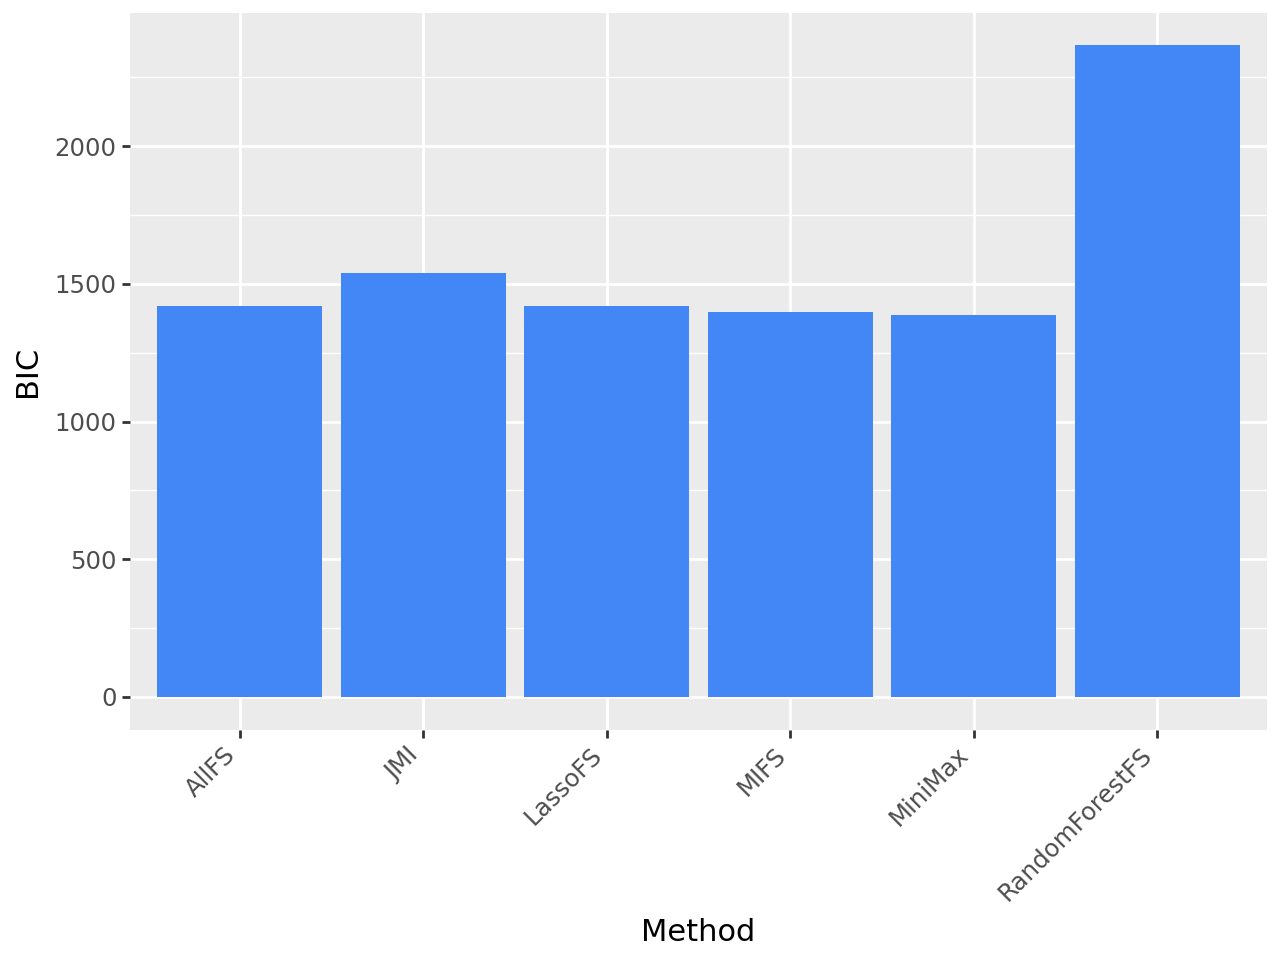

In [19]:
plot_BIC(aids_experiment.results_pd)

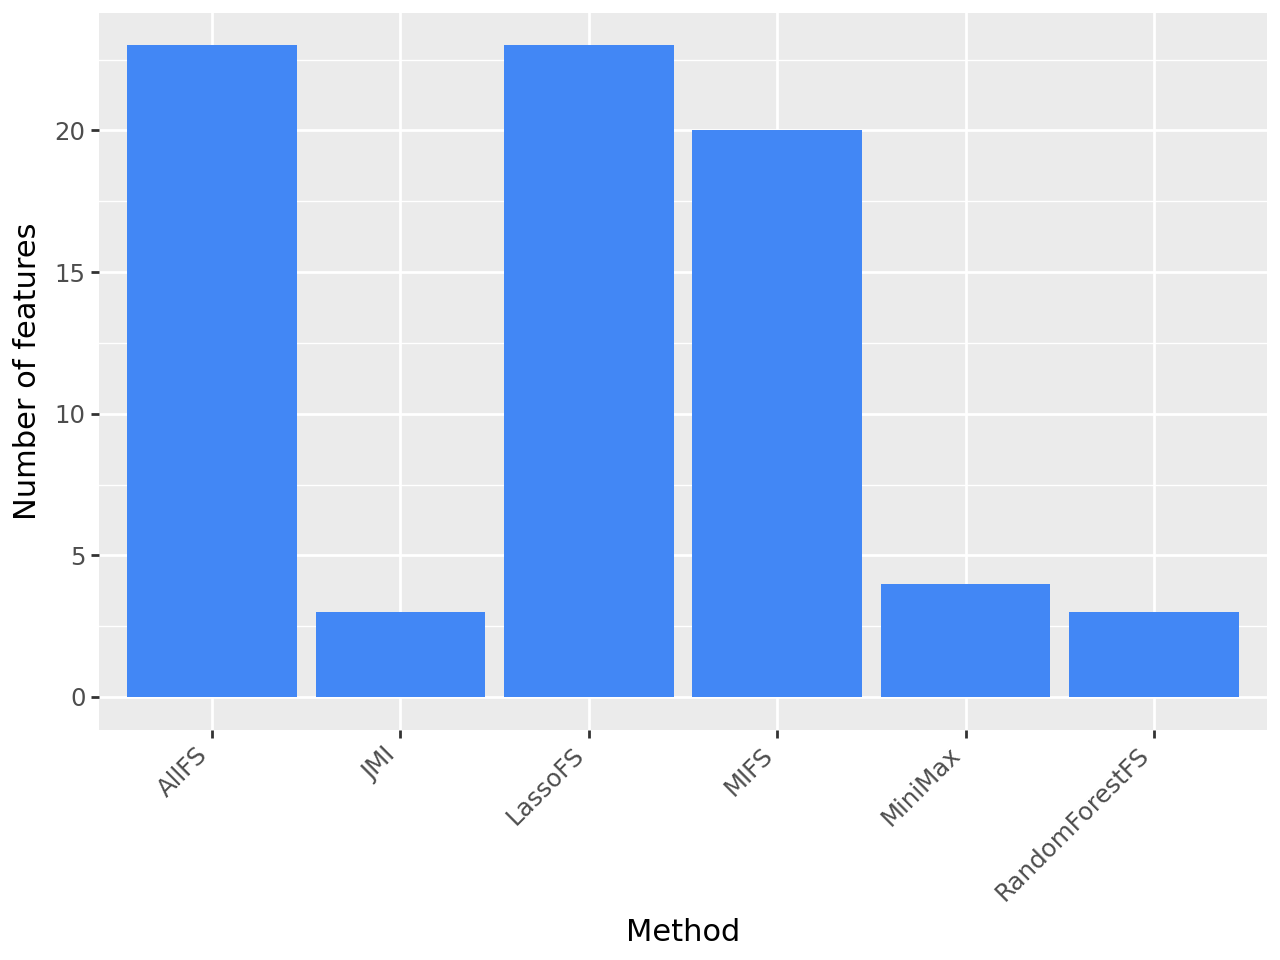

In [20]:
plot_len(aids_experiment.results_pd)

# infrared

In [21]:
infrared = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared.data.features 
y = infrared.data.targets 

In [22]:
df = pd.concat([y["aveOralF"], X], axis=1)._get_numeric_data()
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [23]:
features_sets = generate_fs_list(df)

In [24]:
infrared_experiment = Experiment(features_sets, OLS, df, "aveOralF")
infrared_experiment.fit_fs()
infrared_experiment.print_results()

R-squared adjusted for AllFS = 0.6036295663057674                   and bic = 194.21178235703377 with 30 features.
R-squared adjusted for JMI = 0.5522476887115926                   and bic = 158.96951144746347 with 3 features.
R-squared adjusted for MiniMax = 0.5693107064103976                   and bic = 125.26230322610044 with 4 features.
R-squared adjusted for MIFS = 0.6036360162446843                   and bic = 135.1812611728994 with 20 features.
R-squared adjusted for LassoFS = 0.6036295663057674                   and bic = 194.21178235703377 with 30 features.
R-squared adjusted for RandomForestFS = 0.5637753991078935                   and bic = 173.8059252365879 with 10 features.


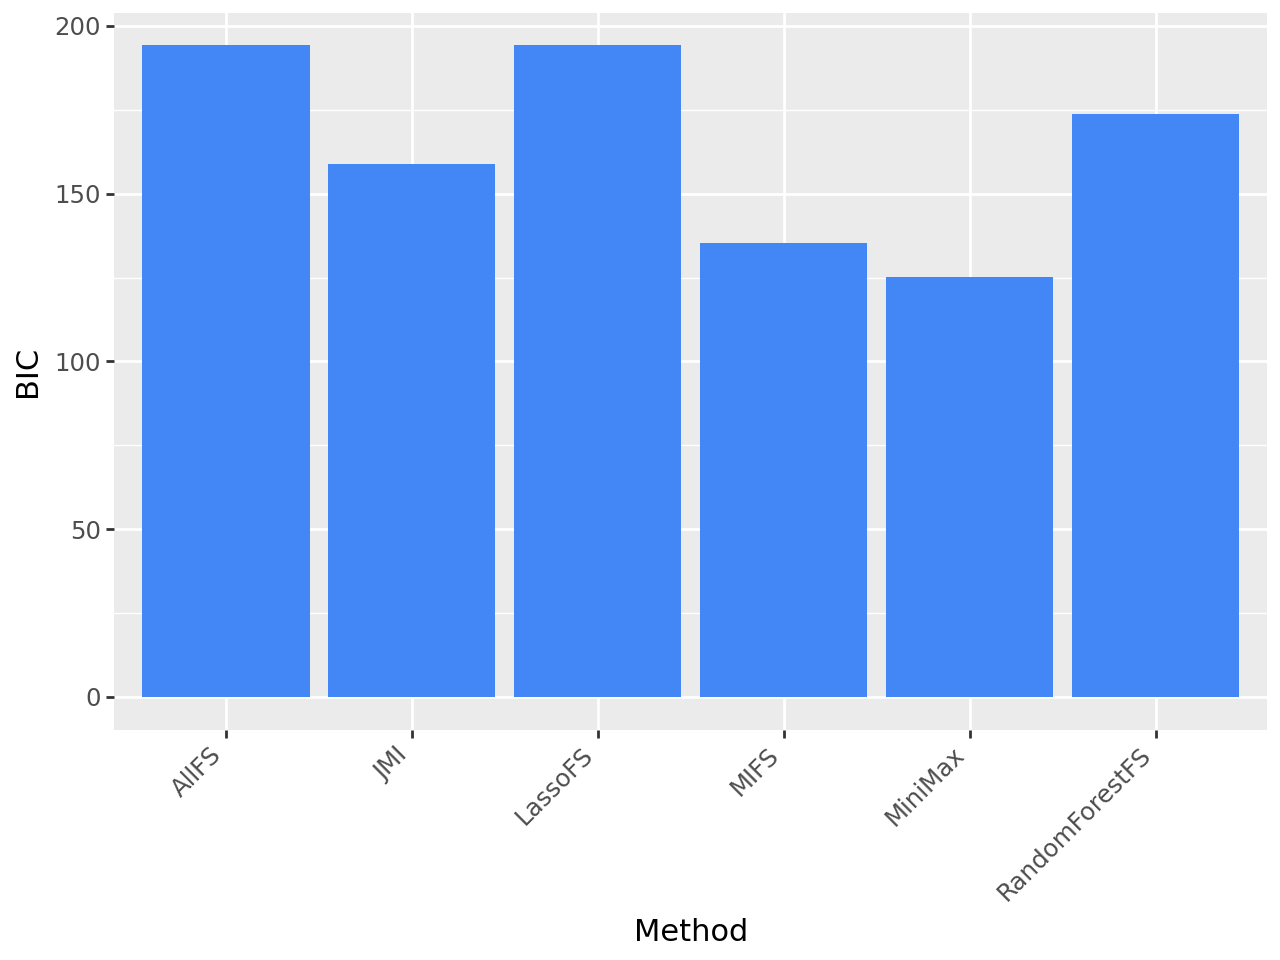

In [25]:
plot_BIC(infrared_experiment.results_pd)

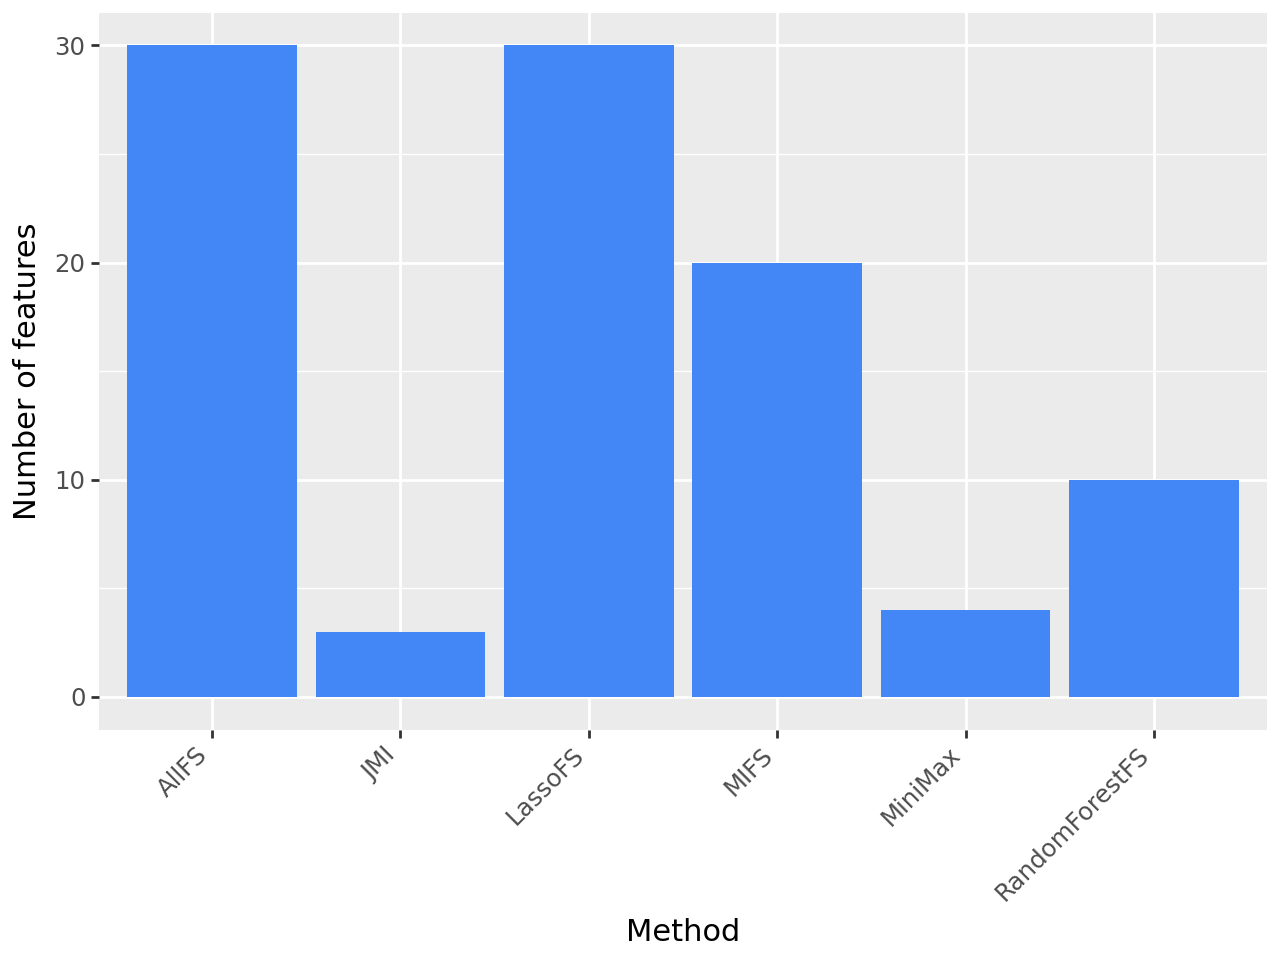

In [26]:
plot_len(infrared_experiment.results_pd)

# Productivity

In [27]:
productivity = fetch_ucirepo(id=597) 
  
# data (as pandas dataframes) 
X = productivity.data.features 
y = productivity.data.targets 

In [28]:
df = pd.concat([y, X], axis=1)._get_numeric_data()
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [29]:
features_sets = generate_fs_list(df, stopping_features=10)

In [30]:
productivity_experiment = Experiment(features_sets, OLS, df, "actual_productivity")
productivity_experiment.fit_fs()
productivity_experiment.print_results()

R-squared adjusted for AllFS = 0.2735745014369706                   and bic = -1098.4173234064185 with 10 features.
R-squared adjusted for JMI = 0.06964442397438875                   and bic = -838.7275672516806 with 4 features.
R-squared adjusted for MiniMax = 0.03992622597488549                   and bic = -813.2584063601569 with 2 features.
R-squared adjusted for MIFS = 0.27357450143697026                   and bic = -1098.4173234064185 with 10 features.
R-squared adjusted for LassoFS = 0.12526721679035235                   and bic = -882.1143713174586 with 9 features.
R-squared adjusted for RandomForestFS = 0.17919921803384808                   and bic = -994.7792189753884 with 3 features.


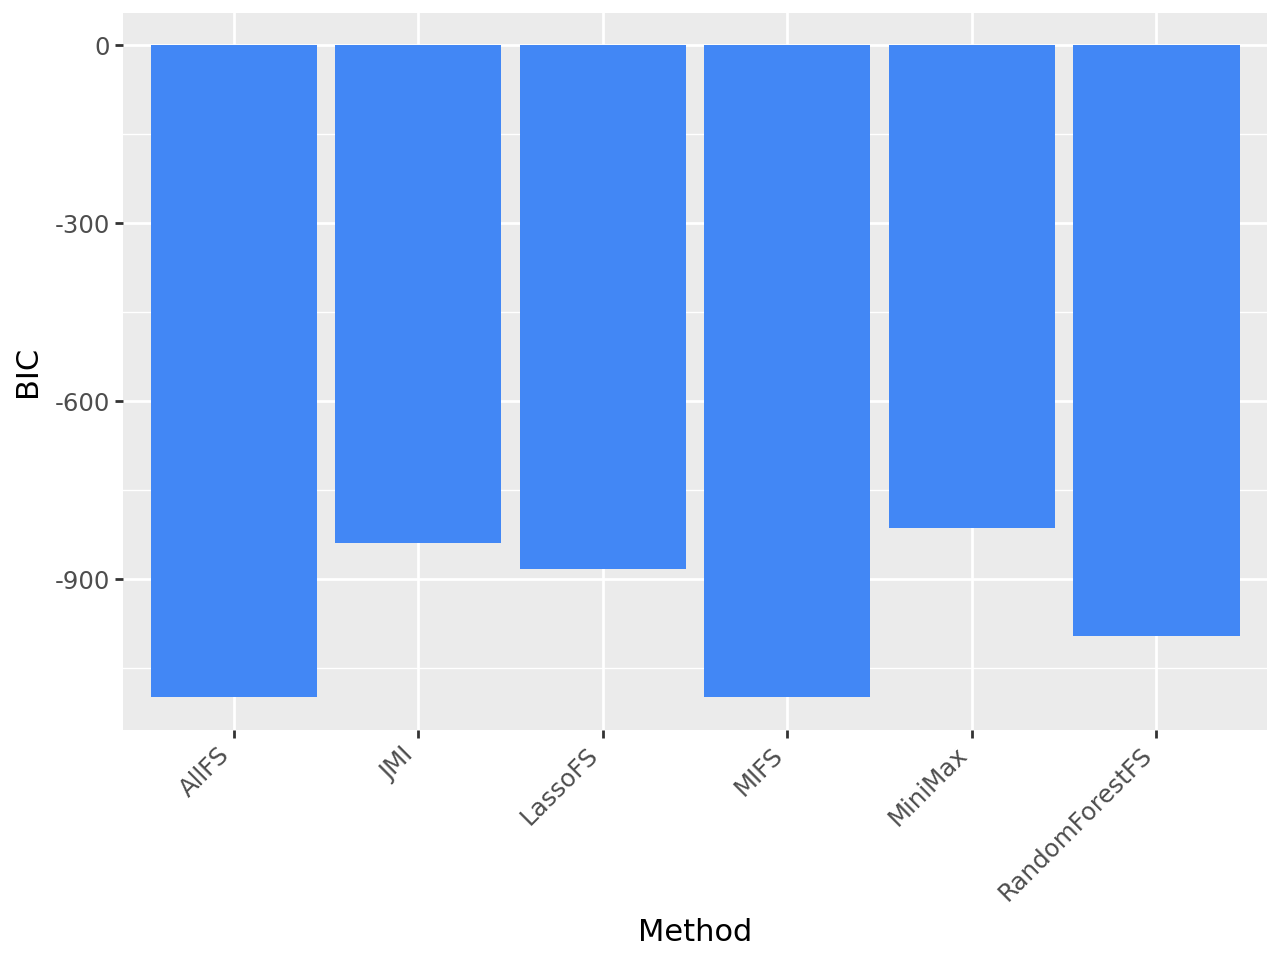

In [31]:
plot_BIC(productivity_experiment.results_pd)

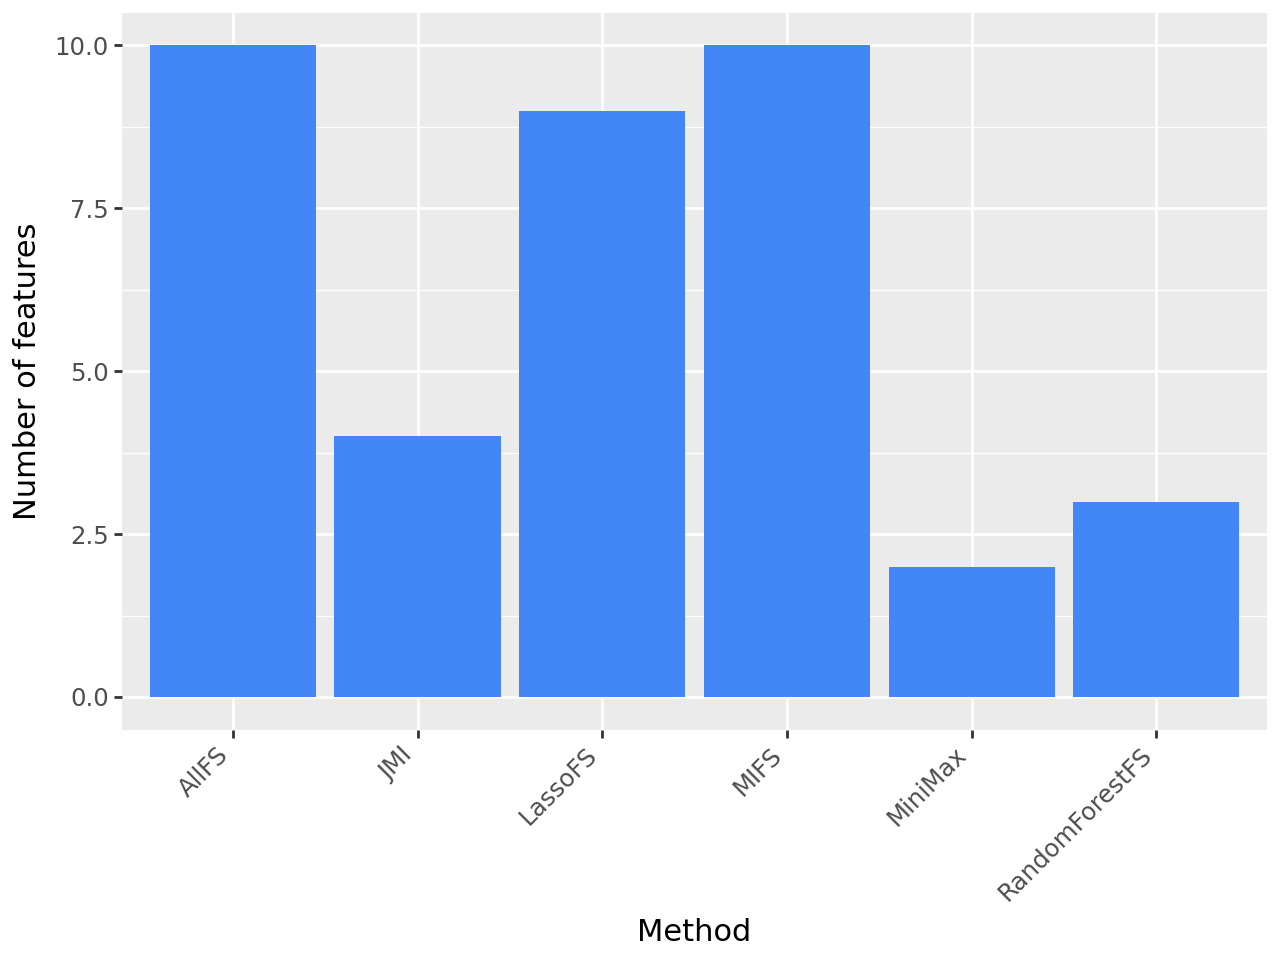

In [32]:
plot_len(productivity_experiment.results_pd)

# AI41

In [33]:
ai41 = fetch_ucirepo(id=601) 
  
# data (as pandas dataframes) 
X = ai41.data.features 
y = ai41.data.targets 

In [34]:
df = pd.concat([y, X], axis=1)._get_numeric_data()
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [35]:
features_sets = generate_fs_list(df, stopping_features=9)

In [36]:
ai41_experiment = Experiment(features_sets, OLS, df, "Machine failure")
ai41_experiment.fit_fs()
ai41_experiment.print_results()

R-squared adjusted for AllFS = 0.9153838676651989                   and bic = -30414.506956918278 with 10 features.
R-squared adjusted for JMI = 0.9151278618797504                   and bic = -30417.135429304508 with 6 features.
R-squared adjusted for MiniMax = 0.9154053144788599                   and bic = -30441.670047601172 with 7 features.
R-squared adjusted for MIFS = 0.9153902196297193                   and bic = -30423.466954445736 with 9 features.
R-squared adjusted for LassoFS = 0.9153838676651989                   and bic = -30414.506956918278 with 10 features.
R-squared adjusted for RandomForestFS = 0.7955461540966542                   and bic = -21641.590998762462 with 4 features.


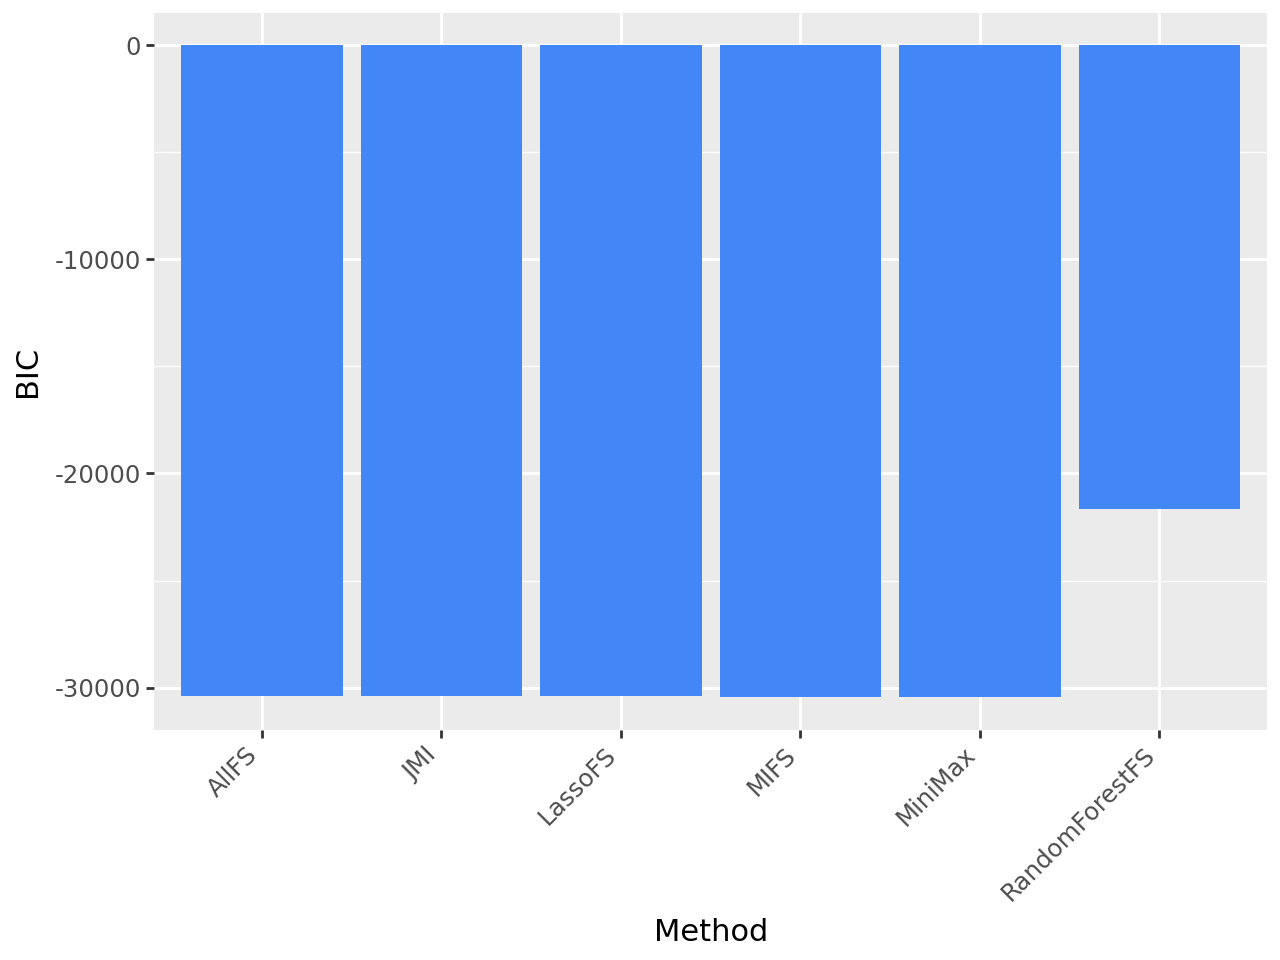

In [37]:
plot_BIC(ai41_experiment.results_pd)

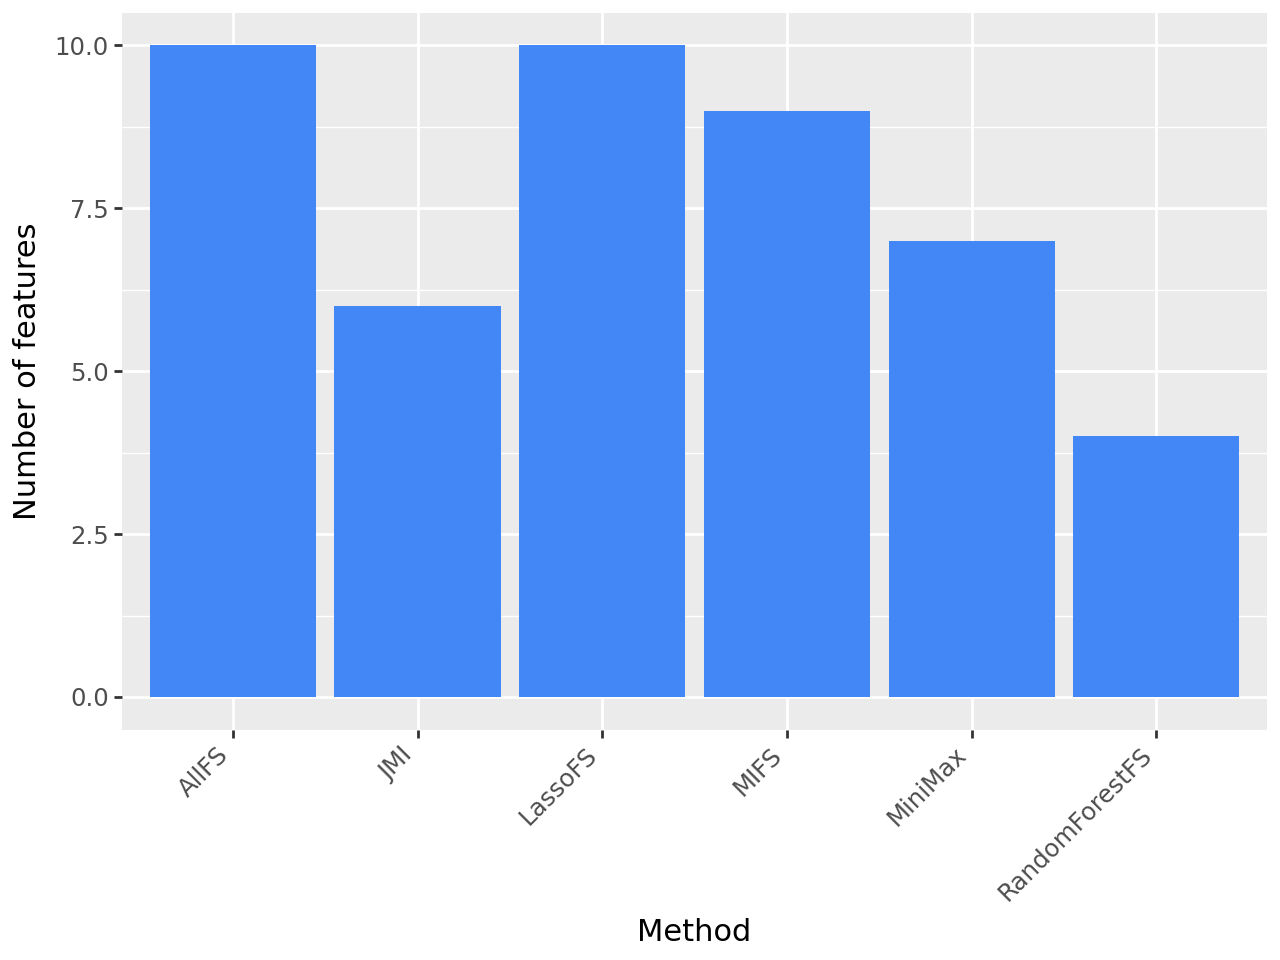

In [38]:
plot_len(ai41_experiment.results_pd)

## Summary

In [39]:
results = communities_and_crime_experiment

In [40]:
result_list = [
    communities_and_crime_experiment.results_pd,
    productivity_experiment.results_pd,
    infrared_experiment.results_pd,
    ai41_experiment.results_pd,
    aids_experiment.results_pd
]

In [41]:
all_results = pd.DataFrame()
for results in result_list:
    results["BIC rank"] = results["bic"].rank(method="min")
    results["Feature rank"] = results["len"].rank(method="min")
    all_results = pd.concat([all_results, results])

In [43]:
all_results.groupby("Method").agg("mean").sort_values("BIC rank")

,rsquared_adj,bic,len,BIC rank,Feature rank
Method,,,,,
MIFS,0.565617,-6374.939493,15.8,2.2,4.2
MiniMax,0.507322,-6347.623125,4.2,2.2,2.2
JMI,0.502093,-6321.978945,3.8,3.4,1.6
AllFS,0.579525,-6329.420177,34.8,3.6,5.0
LassoFS,0.549863,-6286.159587,34.6,4.2,4.8
RandomForestFS,0.442471,-4417.608655,6.8,4.4,2.0


In [44]:
plot_df = all_results[["Method", "BIC rank", "Feature rank"]].melt(id_vars="Method", var_name="Rank")

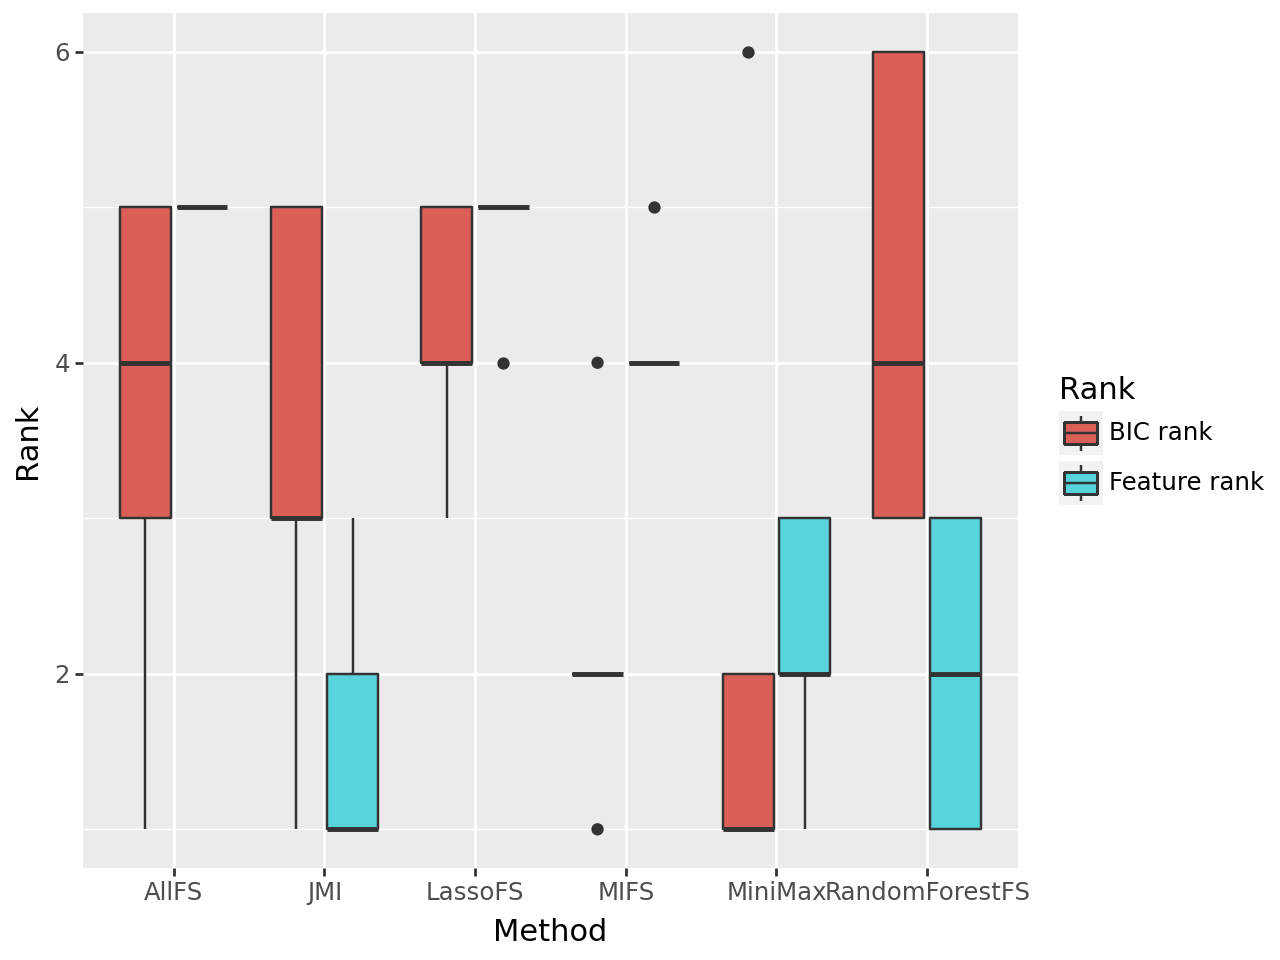

In [46]:
(p9.ggplot(plot_df, p9.aes("Method", "value", fill="Rank")) +
    p9.geom_boxplot() +
    p9.xlab("Method") +
    p9.ylab("Rank"))

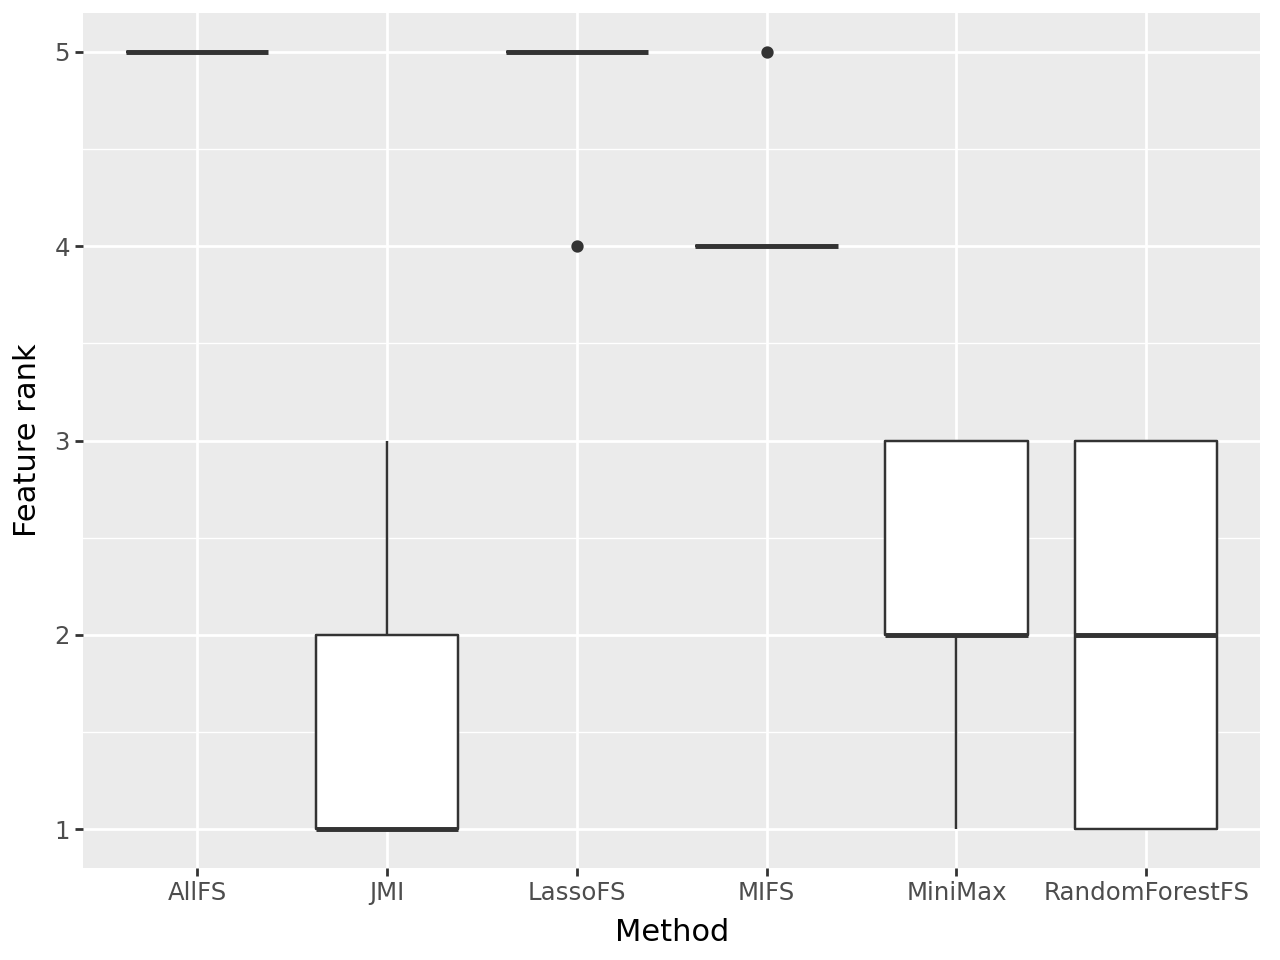

In [ ]:
(p9.ggplot(all_results, p9.aes("Method", "feature_rank")) +
    p9.geom_boxplot() +
    p9.xlab("Method") +
    p9.ylab("Feature rank"))